# Importing necesssary packages

In [47]:
import pandas as pd
from numpy import percentile as ps
import matplotlib.pyplot as plt

## Question 1
### Reading data using pandas

In [48]:
bc = pd.read_csv("data.csv")

## Question 2
### Finding class distribution

In [49]:
classes = bc['diagnosis'].unique()
a = bc[bc['diagnosis']==classes[0]]
b = bc[bc['diagnosis']==classes[1]]
print("Class distribution:\n",classes[0],":",len(a),"\n",classes[1],":",len(b),"\nTotal records :",len(bc))


Class distribution:
 M : 212 
 B : 357 
Total records : 569


## Question 3
### Finding five number summary and plotting boxplot for the same
#### Function find5ns( ) takes as input column number (3 to 32, as first two are non numeric) and also plot boolean which decides whether the plot is drawn or not. It prints the 5 number summary and plot (optional)

In [50]:
headings = bc.columns.tolist()
def find5ns(i,plot):
    quartiles = ps(bc[headings[i]],[25,50,75])
    bc_min,bc_max = bc[headings[i]].min(),bc[headings[i]].max()
    print("5 number summary of",headings[i])
    print('Min: %.3f' % bc_min)
    print('Q1: %.3f' % quartiles[0])
    print('Median: %.3f' % quartiles[1])
    print('Q3: %.3f' % quartiles[2])
    print('Max: %.3f' % bc_max)
    if plot:
        bc.boxplot(column = [headings[i]])

#### We can even put it through a simple for loop and call the function over every column with ease

5 number summary of texture_mean
Min: 9.710
Q1: 16.170
Median: 18.840
Q3: 21.800
Max: 39.280


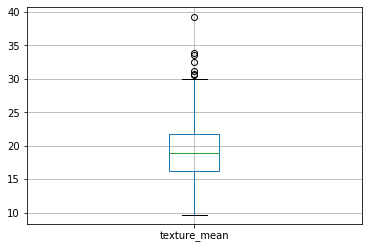

In [51]:
find5ns(3,plot=True)

In [52]:
find5ns(4,plot = False)

5 number summary of perimeter_mean
Min: 43.790
Q1: 75.170
Median: 86.240
Q3: 104.100
Max: 188.500


## Question 4
### Plotting boxplot for attributes and comparing them with respect to different classes
#### To this end i've written a function that plots the column that is given as input to the function myboxplot( ). It also gives the 5 number summary (See previous) for better understanding the boxplot.

In [54]:
def myboxplot(i):
    find5ns(i,plot = False)
    bc.boxplot(column = [headings[i]], by = 'diagnosis')

#### Similar to previous cases, we can use a for loop to plot for all columns to enhance understanding or specify columns we want.

5 number summary of texture_mean
Min: 9.710
Q1: 16.170
Median: 18.840
Q3: 21.800
Max: 39.280


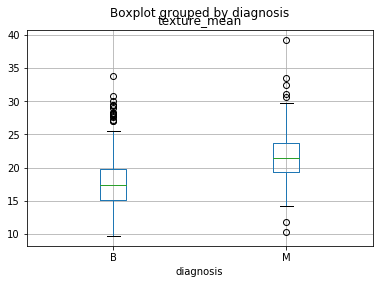

In [56]:
myboxplot(3)

5 number summary of area_mean
Min: 143.500
Q1: 420.300
Median: 551.100
Q3: 782.700
Max: 2501.000


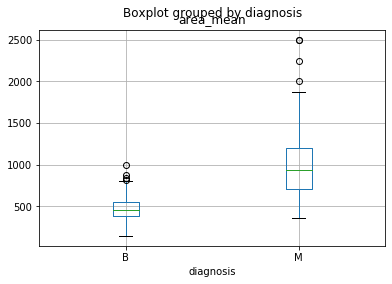

In [57]:
myboxplot(5)

## Question 5
### Plot histogram for attributes
#### The function plothist( ) plots histogram for selected columns. Plotting all columns is possible but is not plausible because no inference can be drawn because of too many attributes.

In [58]:
def plothist(i):
    bc[headings[i]].plot.hist(bins=20, alpha = 0.7,rwidth=0.85)
    plt.xlabel(headings[i])
    plt.title("Histogram of "+headings[i])
    plt.grid(axis='y', alpha=0.75)
    find5ns(i,plot = False)

#### Similar to previous cases I've maintained modularity, so this function can be used in a for loop or on a specific column. It displays the 5 number summary so we can better understand the plotted distribution

5 number summary of texture_mean
Min: 9.710
Q1: 16.170
Median: 18.840
Q3: 21.800
Max: 39.280


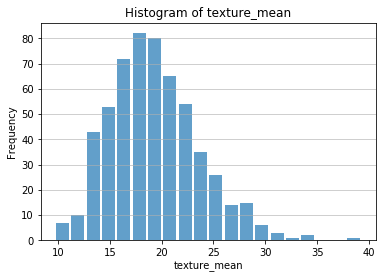

In [59]:
plothist(3)

As we can see in the above case. The 5 number summary is graphically depicted. The median is pretty close to the mean. It is a good example of a bell curve with a relatively narrow distribution. The example on the far right could be a possible outlier.

5 number summary of area_mean
Min: 143.500
Q1: 420.300
Median: 551.100
Q3: 782.700
Max: 2501.000


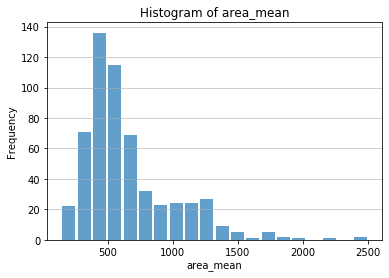

In [60]:
plothist(5)

The above histogram is of the area of the cell. Not really a perfect gaussian distributin. It is skewed towards the right side. The examples on the far right are possible outliers. Most distributions are between minimum and Q3 values.